import libraries

In [60]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import miceforest as mf #imputer
from scipy.stats import chi2_contingency

# preprocessor pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder,  FunctionTransformer

In [61]:
# import data
df = pd.read_csv('second_hand_cars.csv')
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

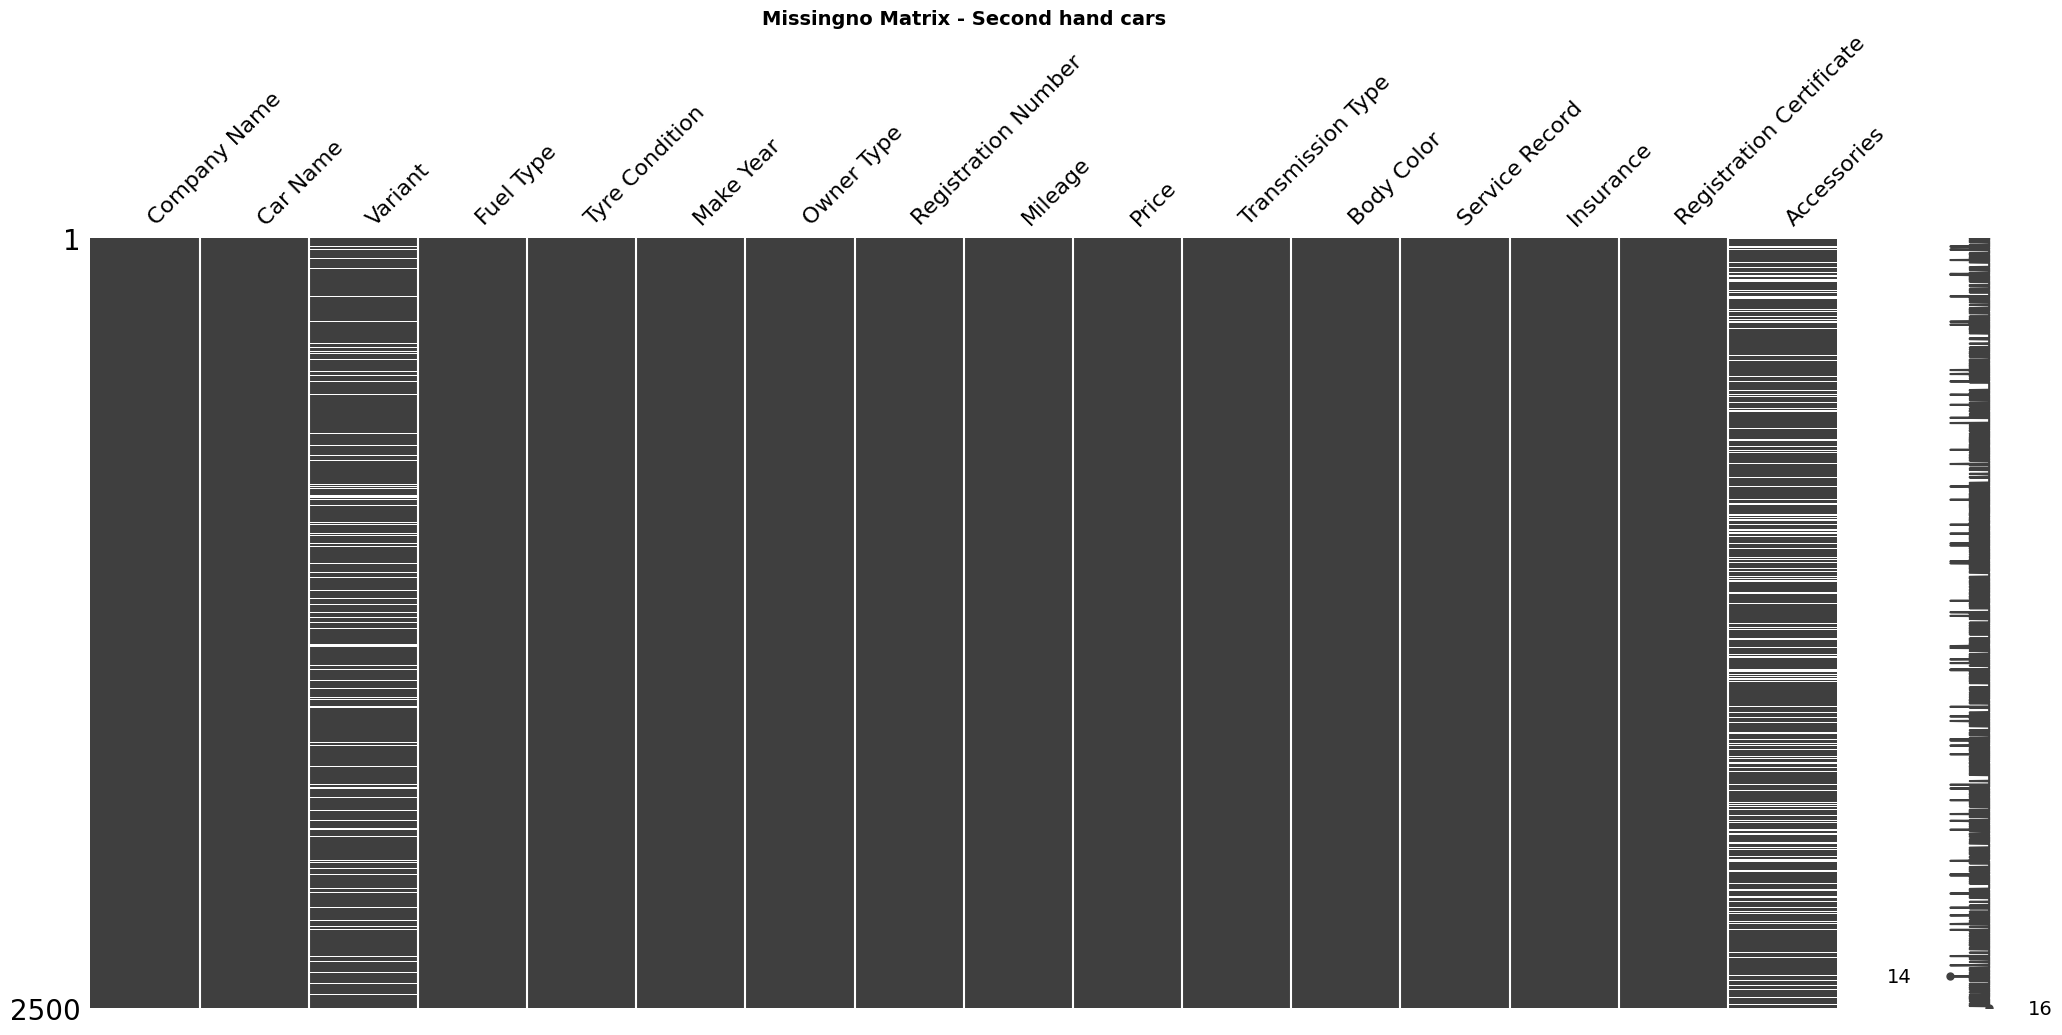

In [63]:
msno.matrix(df)
plt.title('Missingno Matrix - Second hand cars', fontweight='bold', fontsize=14)
plt.show()

> columns variant and accessories have missing values

In [64]:
df['Variant'].value_counts()

Variant
LE          270
GT          261
RXE         255
Highline    254
SE          250
ZXI         245
EX          241
XL          234
SL          228
Name: count, dtype: int64

In [65]:
df['Accessories'].value_counts()

Accessories
Sunroof                                               119
Music System                                           96
GPS                                                    96
Leather Seats                                          94
Alloy Wheels                                           75
                                                     ... 
GPS, Alloy Wheels, Sunroof, Leather Seats               1
Sunroof, Music System, GPS, Leather Seats               1
Music System, Sunroof, Alloy Wheels, Leather Seats      1
Sunroof, Alloy Wheels, GPS, Music System                1
Alloy Wheels, GPS, Leather Seats, Music System          1
Name: count, Length: 203, dtype: int64

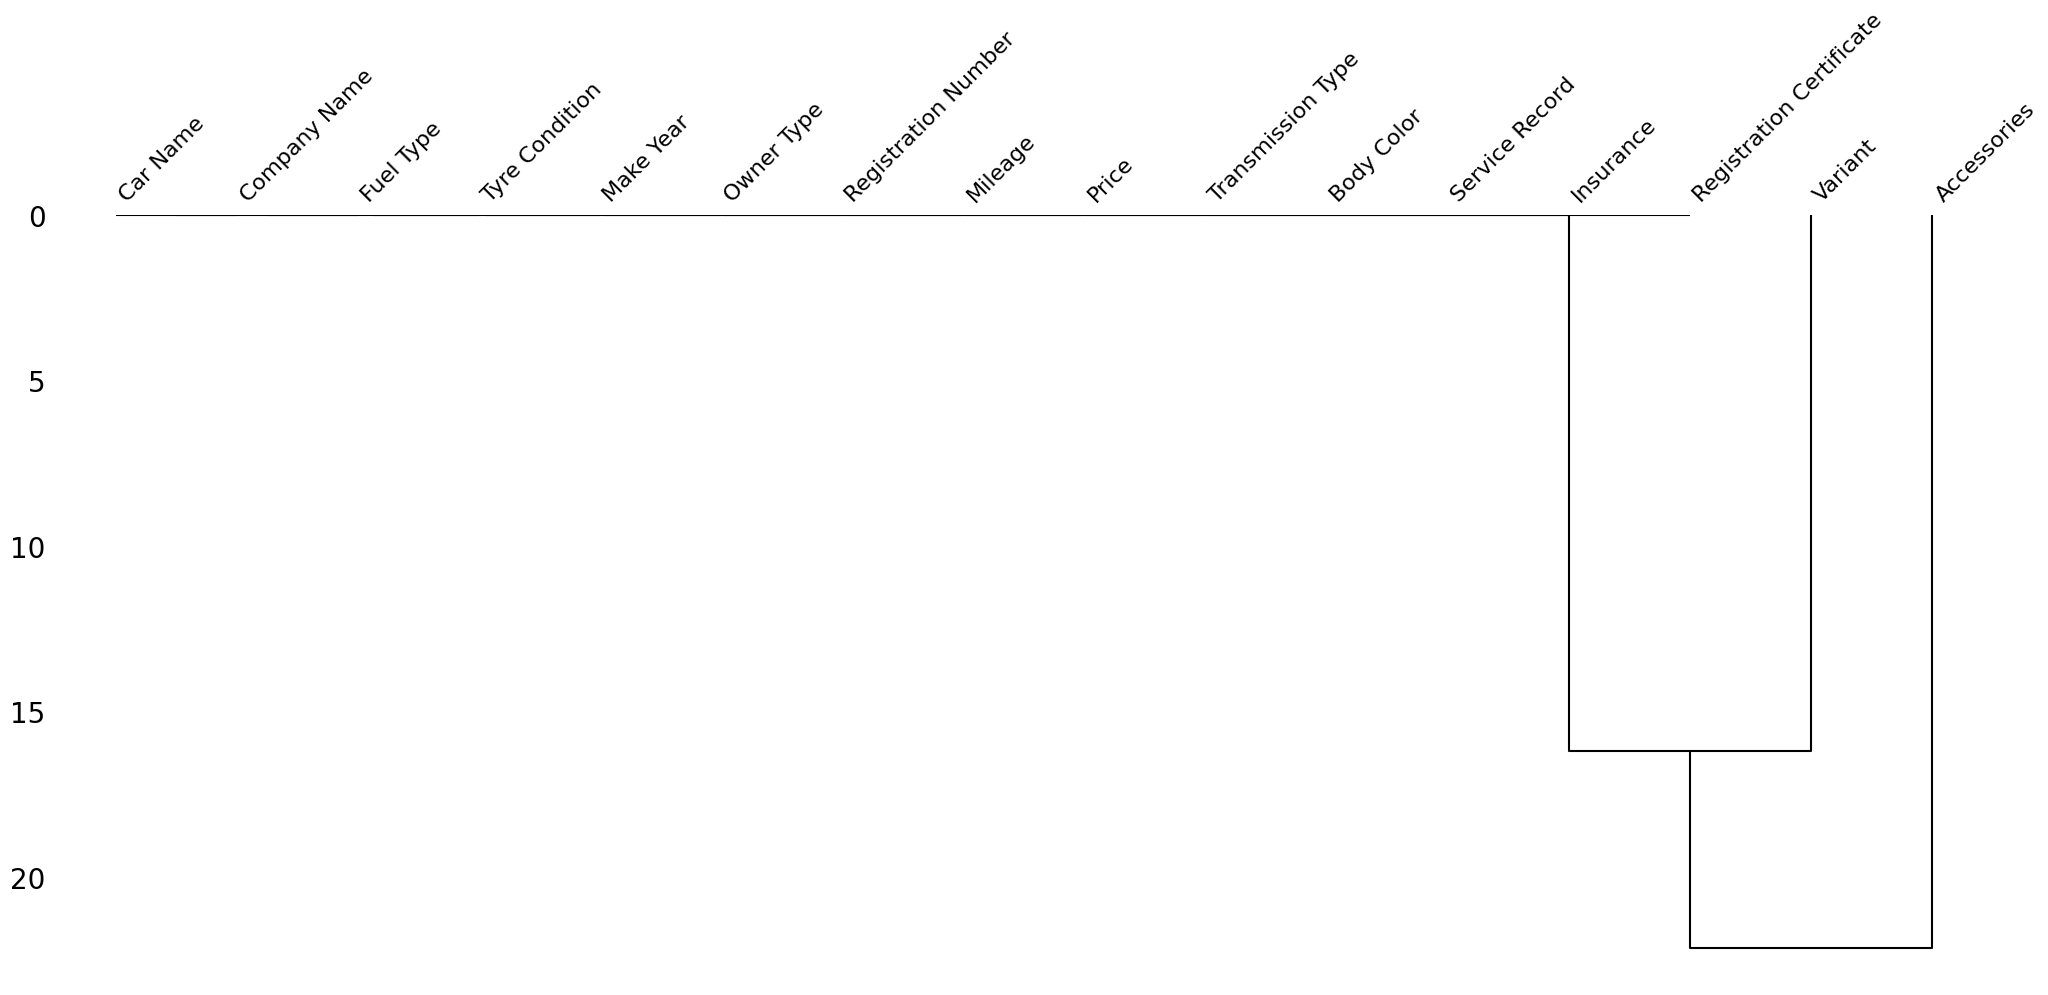

In [66]:
msno.dendrogram(df)
plt.show()

In [67]:
df['Accessories'] = df['Accessories'].fillna('None')

In [68]:
# Create contingency table
contingency_table = pd.crosstab(df['Insurance'], df['Variant'].isna())
print("Contingency Table:\n", contingency_table)

Contingency Table:
 Variant               False  True 
Insurance                         
No Current Insurance   1149    137
Valid Until [date]     1089    125


In [69]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square: {chi2}, p-value: {p}")
if p < 0.05:
    print("Significant relationship between Insurance and Variant missingness (MAR likely).")
else:
    print("No significant relationship detected.")


Chi-square: 0.05091951469645958, p-value: 0.8214709050777002
No significant relationship detected.


In [70]:
# Impute 'Variant' with mode
mode_variant = df['Variant'].mode()[0]  # 'LE' based on your counts
df['Variant'] = df['Variant'].fillna(mode_variant)

In [71]:
df = df.drop_duplicates()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

Car Age

In [73]:
df['Make Year'].value_counts()

Make Year
2015    270
2019    262
2022    258
2024    256
2020    252
2023    251
2021    246
2017    239
2016    237
2018    229
Name: count, dtype: int64

In [74]:
# get the current timestamp
current_timestamp = pd.Timestamp.now()

# extract the year from the timestamp
current_year = current_timestamp.year
df['Car Age'] = current_year - df['Make Year']

Price Per Mile

In [75]:
df['Price/Mile'] = df['Price']/df['Mileage']

Encoding

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Name              2500 non-null   object 
 1   Car Name                  2500 non-null   object 
 2   Variant                   2500 non-null   object 
 3   Fuel Type                 2500 non-null   object 
 4   Tyre Condition            2500 non-null   object 
 5   Make Year                 2500 non-null   int64  
 6   Owner Type                2500 non-null   object 
 7   Registration Number       2500 non-null   object 
 8   Mileage                   2500 non-null   int64  
 9   Price                     2500 non-null   int64  
 10  Transmission Type         2500 non-null   object 
 11  Body Color                2500 non-null   object 
 12  Service Record            2500 non-null   object 
 13  Insurance                 2500 non-null   object 
 14  Registra

In [77]:
df.head(5)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Car Age,Price/Mile
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",7,14.377571
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,None,5,11.634364
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,None,3,6.672219
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",1,6.865880
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",7,8.304536


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Name              2500 non-null   object 
 1   Car Name                  2500 non-null   object 
 2   Variant                   2500 non-null   object 
 3   Fuel Type                 2500 non-null   object 
 4   Tyre Condition            2500 non-null   object 
 5   Make Year                 2500 non-null   int64  
 6   Owner Type                2500 non-null   object 
 7   Registration Number       2500 non-null   object 
 8   Mileage                   2500 non-null   int64  
 9   Price                     2500 non-null   int64  
 10  Transmission Type         2500 non-null   object 
 11  Body Color                2500 non-null   object 
 12  Service Record            2500 non-null   object 
 13  Insurance                 2500 non-null   object 
 14  Registra

In [79]:
df.head(1)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Car Age,Price/Mile
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",7,14.377571


In [80]:
df = df.drop(columns= ['Make Year', 'Registration Number', 'Service Record'], axis= 1)

In [81]:
df.shape

(2500, 15)

In [88]:
df.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Owner Type', 'Mileage', 'Price', 'Transmission Type', 'Body Color',
       'Insurance', 'Registration Certificate', 'Accessories', 'Car Age',
       'Price/Mile'],
      dtype='object')

In [89]:
numeric_cols = [
    'Mileage',
    'Price',
    'Car Age',
    'Price/Mile'
]

nominal_cols = [
    'Company Name',
    'Car Name',
    'Variant',
    'Transmission Type',
    'Body Color',
    'Insurance',
    'Registration Certificate',
    'Accessories',
    'Fuel Type'
]

ordinal_cols = [
    'Tyre Condition',
    'Owner Type'
]

In [90]:
for i in ordinal_cols:
    print(df[i].unique())

['Needs Replacement' 'New' 'Used']
['Second' 'Third' 'First']


In [95]:
categorical_cols = [
    ['Needs Replacement', 'New', 'Used'],
    ['Second', 'Third', 'First'],
]

In [96]:
# transformers
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
    ])

ordinal_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=categorical_cols))
    ])

nominal_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

In [97]:
# combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("cat", nominal_transformer, nominal_cols)
    ]
)

In [98]:
# Fit & transform
X_transformed = preprocessor.fit_transform(df)

In [99]:
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35827 stored elements and shape (2500, 257)>

In [103]:
# Convert sparse matrix to dense array
X_transformed_dense = X_transformed.toarray()

# Now create the DataFrame
feature_names = preprocessor.get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed_dense, columns=feature_names)

print("Transformed data shape:", X_transformed_df.shape)
X_transformed_df.head()

Transformed data shape: (2500, 257)


,num__Mileage,num__Price,num__Car Age,num__Price/Mile,ord__Tyre Condition,ord__Owner Type,cat__Company Name_Chevrolet,cat__Company Name_Ford,cat__Company Name_Honda,cat__Company Name_Hyundai,...,"cat__Accessories_Sunroof, Music System, Alloy Wheels, GPS","cat__Accessories_Sunroof, Music System, Alloy Wheels, Leather Seats","cat__Accessories_Sunroof, Music System, GPS","cat__Accessories_Sunroof, Music System, GPS, Alloy Wheels","cat__Accessories_Sunroof, Music System, GPS, Leather Seats","cat__Accessories_Sunroof, Music System, Leather Seats","cat__Accessories_Sunroof, Music System, Leather Seats, GPS",cat__Fuel Type_CNG,cat__Fuel Type_Diesel,cat__Fuel Type_Petrol
0,-0.936010,0.653591,0.525856,0.423144,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.105025,-0.446084,-0.165332,0.174142,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.172127,0.117749,-0.856521,-0.276273,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.619588,-0.540968,-1.547709,-0.258694,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.340800,0.453834,0.525856,-0.128107,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
corr = X_transformed_df.corr()

In [107]:
corr

,num__Mileage,num__Price,num__Car Age,num__Price/Mile,ord__Tyre Condition,ord__Owner Type,cat__Company Name_Chevrolet,cat__Company Name_Ford,cat__Company Name_Honda,cat__Company Name_Hyundai,...,"cat__Accessories_Sunroof, Music System, Alloy Wheels, GPS","cat__Accessories_Sunroof, Music System, Alloy Wheels, Leather Seats","cat__Accessories_Sunroof, Music System, GPS","cat__Accessories_Sunroof, Music System, GPS, Alloy Wheels","cat__Accessories_Sunroof, Music System, GPS, Leather Seats","cat__Accessories_Sunroof, Music System, Leather Seats","cat__Accessories_Sunroof, Music System, Leather Seats, GPS",cat__Fuel Type_CNG,cat__Fuel Type_Diesel,cat__Fuel Type_Petrol
num__Mileage,1.000000,-0.027504,-0.043648,-0.669966,-0.000122,-0.030175,0.003576,0.010169,0.002122,0.008508,...,-0.004502,-0.041875,-0.004195,0.012495,-0.029261,-0.030544,-0.006233,-0.029213,0.007924,0.021388
num__Price,-0.027504,1.000000,0.000419,0.344899,0.019556,0.001701,-0.025555,0.033108,0.013647,0.020225,...,0.006297,0.005600,0.048295,-0.002470,-0.014214,-0.011623,-0.037605,0.002136,-0.020539,0.018431
num__Car Age,-0.043648,0.000419,1.000000,0.049427,0.028841,-0.005275,0.004560,0.023948,0.000023,0.011564,...,0.000366,-0.020453,-0.043329,-0.035249,-0.030960,-0.003529,-0.029689,0.030772,-0.007187,-0.023692
num__Price/Mile,-0.669966,0.344899,0.049427,1.000000,-0.004160,0.020476,-0.001469,0.000088,0.008920,-0.015841,...,0.017996,0.044580,0.055447,-0.015578,0.016595,-0.004076,-0.008572,0.028653,-0.016095,-0.012640
ord__Tyre Condition,-0.000122,0.019556,0.028841,-0.004160,1.000000,-0.022056,-0.005949,0.028625,-0.015430,-0.006900,...,0.031050,0.037678,-0.037994,0.033857,0.024992,-0.017773,-0.013660,0.040107,-0.022668,-0.017555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"cat__Accessories_Sunroof, Music System, Leather Seats",-0.030544,-0.011623,-0.003529,-0.004076,-0.017773,-0.036781,0.007654,0.007654,-0.017937,-0.016542,...,-0.002599,-0.002121,-0.003358,-0.002372,-0.001060,1.000000,-0.001837,-0.005641,0.010722,-0.005078
"cat__Accessories_Sunroof, Music System, Leather Seats, GPS",-0.006233,-0.037605,-0.029689,-0.008572,-0.013660,0.028848,0.027054,-0.011528,-0.011733,-0.010821,...,-0.001700,-0.001388,-0.002197,-0.001552,-0.000693,-0.001837,1.000000,0.024265,0.000010,-0.024370
cat__Fuel Type_CNG,-0.029213,0.002136,0.030772,0.028653,0.040107,0.004235,0.034885,0.003778,-0.014924,0.010146,...,-0.034891,-0.007289,-0.004830,0.006066,0.028121,-0.005641,0.024265,1.000000,-0.502852,-0.500139
cat__Fuel Type_Diesel,0.007924,-0.020539,-0.007187,-0.016095,-0.022668,-0.027204,-0.014075,-0.016908,0.020587,-0.002895,...,0.017357,0.014166,-0.004464,-0.031645,-0.014141,0.010722,0.000010,-0.502852,1.000000,-0.497004


In [111]:
# We take the absolute value because negative correlations are just as strong as positive ones.
corr_matrix = corr.abs()

In [110]:
# We don’t want to double-check each pair (A vs B and B vs A):
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

In [113]:
# Find columns with high correlation
threshold = 0.9  # you can tune this (0.8, 0.85, 0.95, etc.)
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [115]:
# Now X_reduced has fewer features with reduced redundancy.
X_reduced = X_transformed_df.drop(columns=to_drop)

In [116]:
X_reduced.shape

(2500, 255)

> reduced columns from 277 - 255

PCA

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)   # keep 95% variance
X_pca = pca.fit_transform(X_reduced)

print("Original shape:", X_reduced.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (2500, 255)
Reduced shape: (2500, 53)


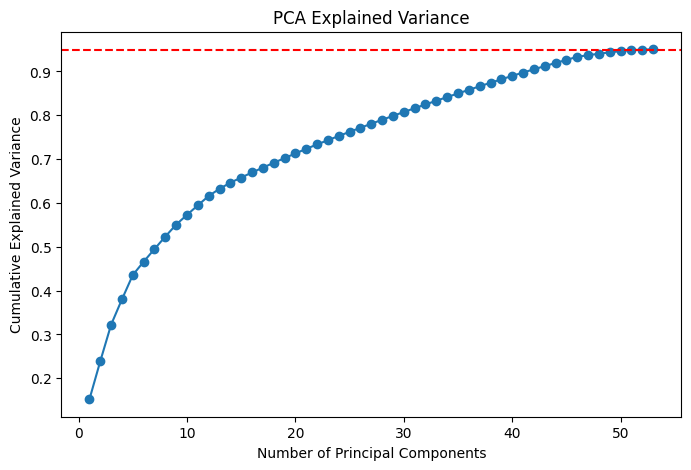

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [121]:
X_pca

array([[ 1.12997876,  0.29364206,  0.29927994, ..., -0.04488912,
         0.01464686,  0.00445665],
       [ 0.66298894,  0.27090313, -0.88265974, ..., -0.04382479,
         0.02093036,  0.02826033],
       [-0.15997301, -0.7646678 , -0.4175805 , ..., -0.00325311,
         0.01583981, -0.00900698],
       ...,
       [-0.01134748,  0.10924571, -1.72355495, ..., -0.15365357,
        -0.04473901, -0.12768026],
       [-0.24036414,  0.81550417, -1.0603344 , ..., -0.0677514 ,
        -0.02376985, -0.00996777],
       [ 0.60595808, -2.02270946,  0.1753223 , ..., -0.09103062,
        -0.02072859, -0.0708763 ]], shape=(2500, 53))

In [122]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_


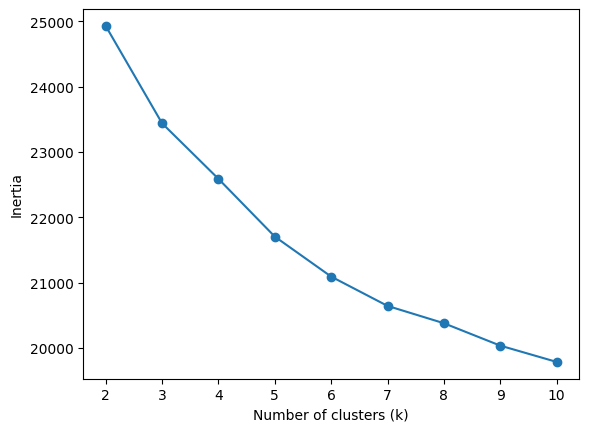

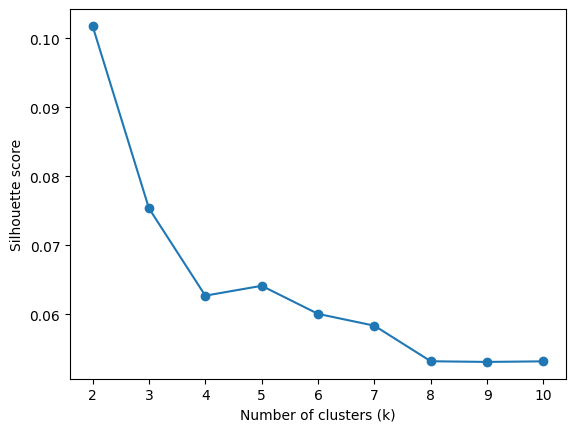

In [123]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, km.labels_))

# Plot elbow
plt.plot(K, inertias, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Plot silhouette
plt.plot(K, sil_scores, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.show()


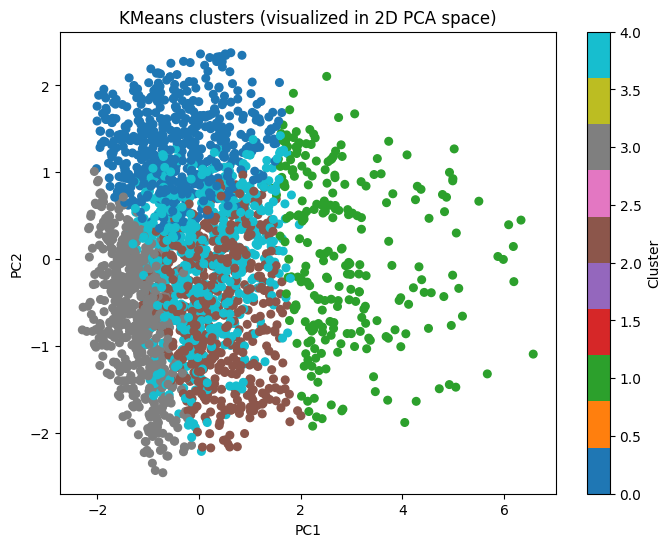

In [124]:
import matplotlib.pyplot as plt

# Run PCA with 2 components just for plotting
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_reduced)

# Fit KMeans on your high-dimensional PCA space
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_pca)

# Plot using the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans.labels_, cmap='tab10', s=30)
plt.title("KMeans clusters (visualized in 2D PCA space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()
